In [1]:
# 필요한 환경을 설정합니다.
from mlwpy import *
%matplotlib inline

In [2]:
# 분꽃(iris) 데이터를 불러옵니다.
iris = datasets.load_iris()

# pandas 데이터프레임에 분꽃 데이터를 넣어 테이블로 시각화합니다.
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
display(pd.concat([iris_df.head(3), iris_df.tail(3)]))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1000,3.5000,1.4000,0.2000,0
1,4.9000,3.0000,1.4000,0.2000,0
2,4.7000,3.2000,1.3000,0.2000,0
147,6.5000,3.0000,5.2000,2.0000,2
148,6.2000,3.4000,5.4000,2.3000,2
149,5.9000,3.0000,5.1000,1.8000,2


C:\Users\it\anaconda3\envs\book_base\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\it\anaconda3\envs\book_base\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\it\anaconda3\envs\book_base\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\it\anaconda3\envs\book_base\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\it\anaconda3\envs\book_base\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nob

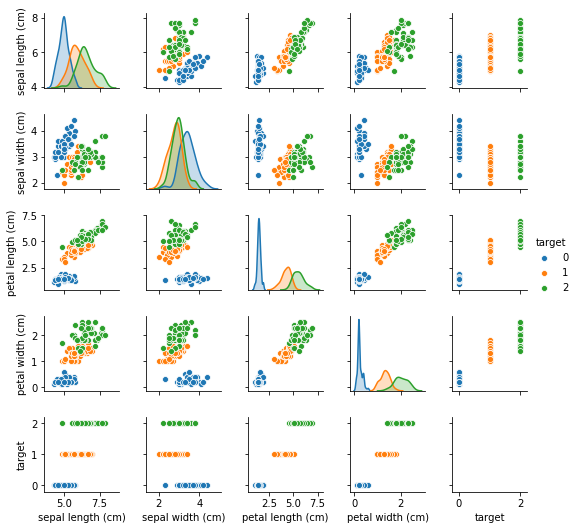

In [3]:
# 특성과 타깃 클래스가 가진 분포를 그래프로 시각화합니다.
# 붉은 경고 메시지가 나더라도 무시하세요.
sns.pairplot(iris_df, hue='target', height=1.5)

In [4]:
# 타깃 클래스를 출력합니다.
print('targets: {}'.format(iris.target_names), 
     iris.target_names[0], sep="\n")

targets: ['setosa' 'versicolor' 'virginica']
setosa


In [5]:
# 간단하게 훈련 데이터와 테스트 데이터를 분리합니다.
(iris_train_ftrs, iris_test_ftrs,
 iris_train_tgt, iris_test_tgt) = skms.train_test_split(iris.data,
                                                       iris.target,
                                                       test_size=.25)

# 분리한 훈련 데이터와 테스트 데이터의 특성 형태를 출력합니다.
print("Train features shape:", iris_train_ftrs.shape)
print("Test features shape:", iris_test_ftrs.shape)

Train features shape: (112, 4)
Test features shape: (38, 4)


In [6]:
# 정답과 학생의 시험 답안입니다.
answer_key = np.array([True, True, False, True])
student_answers = np.array([True, True, True, True]) #자포자기한 학생

In [7]:
# 정확도를 수동으로 측정합니다.
correct = answer_key == student_answers
num_correct = correct.sum() # 정답을 맞추면 1이므로 이를 다 더합니다.
print("manual accuracy:", num_correct / len(answer_key))

manual accuracy: 0.75


In [8]:
# sklearn으로 정확도를 구합니다.
print("sklearn accuracy:",
     metrics.accuracy_score(answer_key,
                           student_answers))

sklearn accuracy: 0.75


In [9]:
# 기본 옵션 n_neighbors = 5
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
fit = knn.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

# 예측 결과를 따로 분리해 둔 테스트 타깃으로 평가합니다.
print("3NN accuracy:",
     metrics.accuracy_score(iris_test_tgt, preds))

3NN accuracy: 1.0


In [10]:
nb = naive_bayes.GaussianNB()
fit = nb.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

print("NB accuracy:",
      metrics.accuracy_score(iris_test_tgt, preds))

NB accuracy: 1.0


In [11]:
# 독립적인 코드로 묶어보았습니다.
from sklearn import (datasets, metrics, model_selection as skms,
                    naive_bayes, neighbors)

# random_state를 설정하여 모델의 결과를 재현가능하게 만듭니다.
# 그렇지 않으면 실행할 때마다 다른 결과가 출력됩니다.
# 더 자세한 내용은 제 5장에서 확인하세요.
iris = datasets.load_iris()
(iris_train_ftrs, iris_test_ftrs, 
 iris_train_tgt, iris_test_tgt) = skms.train_test_split(iris.data,
                                                        iris.target, 
                                                        test_size=.90,
                                                        random_state=42) 

models = {'kNN': neighbors.KNeighborsClassifier(n_neighbors=3),
         'NB': naive_bayes.GaussianNB()}

for name, model in models.items():
    fit = model.fit(iris_train_ftrs, iris_train_tgt)
    predictions = fit.predict(iris_test_ftrs)

    score = metrics.accuracy_score(iris_test_tgt, predictions)
    print("{:>3s}: {:0.2f}".format(name, score))

kNN: 0.96
 NB: 0.81


In [12]:
# iris 데이터셋을 가져오는데 걸리는 시간을 1회 측정합니다.
%timeit -r1 datasets.load_iris()

1.07 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)


In [13]:
%%timeit -r1 -n1
(iris_train_ftrs, iris_test_ftrs, 
 iris_train_tgt,  iris_test_tgt) = skms.train_test_split(iris.data,
                                                         iris.target, 
                                                         test_size=.25)
# 학습과 테스트 데이터를 분리하는데 걸리는 시간을 1회 측정합니다.

449 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [14]:
%%timeit -r1

nb    = naive_bayes.GaussianNB()
fit   = nb.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

metrics.accuracy_score(iris_test_tgt, preds)

# 나이브 베이즈 모델을 학습하고 평가하는데 걸리는 시간을 측정합니다.

668 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)


In [15]:
%%timeit -r1

knn   = neighbors.KNeighborsClassifier(n_neighbors=3)
fit   = knn.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

metrics.accuracy_score(iris_test_tgt, preds)

# knn 모델을 학습하고 평가하는데 걸리는 시간을 측정합니다.

4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


In [16]:
# 각 모델을 학습하는데 걸리는 시간을 줄 단위로 잽니다.
nb = naive_bayes.GaussianNB()
%timeit -r1 fit   = nb.fit(iris_train_ftrs, iris_train_tgt)

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
%timeit -r1 fit = knn.fit(iris_train_ftrs, iris_train_tgt)

413 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
237 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)


In [17]:
# 각 모델이 새로운 데이터를 예측하는데 걸리는 시간을 잽니다.
nb    = naive_bayes.GaussianNB()
fit   = nb.fit(iris_train_ftrs, iris_train_tgt)
%timeit -r1 preds = fit.predict(iris_test_ftrs)

knn   = neighbors.KNeighborsClassifier(n_neighbors=3)
fit   = knn.fit(iris_train_ftrs, iris_train_tgt)
%timeit -r1 preds = fit.predict(iris_test_ftrs)

125 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
3.07 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


In [18]:
# memory_profiler 외부 라이브러리를 불러옵니다.
%load_ext memory_profiler

In [19]:
%%memit
nb    = naive_bayes.GaussianNB()
fit   = nb.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

# 나이브 베이즈 모델을 사용하는데 드는 메모리를 계산합니다.

peak memory: 157.86 MiB, increment: 0.04 MiB


In [20]:
%%memit
knn   = neighbors.KNeighborsClassifier(n_neighbors=3)
fit   = knn.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

# knn 모델을 사용하는데 드는 메모리를 계산합니다.

peak memory: 157.86 MiB, increment: 0.00 MiB


In [21]:
#scripts/knn_memtest.py를 실행하고 결과를 출력합니다.
!python scripts/knn_memtest.py

Filename: scripts/knn_memtest.py

Line #    Mem usage    Increment   Line Contents
     4 127.6016 MiB 127.6016 MiB   @memory_profiler.profile(precision=4)
     5                             def knn_memtest(train, train_tgt, test):
     6 127.6016 MiB   0.0000 MiB       knn   = neighbors.KNeighborsClassifier(n_neighbors=3)
     7 127.7773 MiB   0.1758 MiB       fit   = knn.fit(train, train_tgt)
     8 127.9180 MiB   0.1406 MiB       preds = fit.predict(test)




In [22]:
# 나이브 베이즈의 메모리를 측정하는 독립적 스크립트 예시입니다.
import functools as ft
import memory_profiler
from mlwpy import *

def nb_go(train_ftrs, test_ftrs, train_tgt):
    nb = naive_bayes.GaussianNB()
    fit = nb.fit(train_ftrs, train_tgt)
    preds = fit.predict(test_ftrs)
    
def split_data(dataset):
    split = skms.train_test_split(dataset.data,
                                 dataset.target,
                                 test_size=.25)
    return split[:-1] #test_tgt는 필요하지 않습니다.

def msr_mem(go, args):
    base = memory_profiler.memory_usage()[0]
    mu = memory_profiler.memory_usage((go, args), 
                                      max_usage=True)[0]
    print("{:<3}: -{:.4f} MiB".format(go.__name__, mu-base))
    
if __name__ == "__main__":
    msr = msr_mem
    go = nb_go
    sd = split_data(datasets.load_iris())
    msr(go, sd)

nb_go: -0.0430 MiB


In [23]:
# 나이브 베이즈의 메모리와 시간 소요를 측정합니다.
!python scripts/perf_01.py mem nb
!python scripts/perf_01.py time nb

nb_go: ~0.2969 MiB
nb_go : ~0.0517 sec


In [24]:
# knn의 메모리와 시간 소요를 측정합니다.
!python scripts/perf_01.py mem knn
!python scripts/perf_01.py time knn

knn_go: ~0.5117 MiB
knn_go: ~0.1415 sec
